In [1]:
from math import cos,sin,pi
import numpy
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
our_variables=(numpy.array([pi/2,pi/2,float(input("P_1=")),float(input("P_2="))])) #on définit nos angles/impulsions de départs

P_1=0
P_2=0


In [3]:
our_constantes=(numpy.array([float(input('m=')),float(input('l=')),float(input('g=')),float(input('dt=')),float(input('T='))]))
m=our_constantes[0]      # on définit les constantes de notre problème (poids, longueurs ...)
l=our_constantes[1]
g=our_constantes[2]
dt=our_constantes[3]
T=our_constantes[4] 

m=1
l=1
g=9.81
dt=0.001
T=20


In [4]:
def vector_function(variables):
    O_1=variables[0] #fonction vectorielle qui nous donne l'expression des dérivées des angles/impulsions
    O_2=variables[1] # à partir de leur valeur actuelle
    P_1=variables[2] #l'ordre des dérivées dans le vecteur obtenu correspond à l'ordre dans our_variables
    P_2=variables[3]
    Angle_1_var=6*(m*(l**2)*((2*P_1)-(3*cos(O_1-O_2)*P_2))/(16-9*(cos(O_1-O_2))**2))
    Angle_2_var=6*(m*(l**2)*((8*P_2)-3*cos(O_1-O_2)*P_1)/(16-9*(cos(O_1-O_2))**2))
    P_1_var=(-(1/2)*m*(l**2))*((Angle_1_var*Angle_2_var*sin(O_1-O_2))+3*(g/l)*sin(O_1))
    P_2_var=(-(1/2)*m*(l**2))*((-Angle_1_var*Angle_2_var*sin(O_1-O_2))+((g/l)*sin(O_2)))
    variables_derivative=numpy.array([Angle_1_var,Angle_2_var,P_1_var,P_2_var])
    out=variables_derivative
    return out

In [5]:
def RK_4(variables):
    our_variables_list=[variables] #on crée une liste où on va stocker l'évolution des angles/impulsions dans le temps
    N=int(T/dt)
    i=1
    while i < N:   #méthode RK_4 
        k_1=dt*vector_function(variables)
        k_2=dt*vector_function(variables+(1/2)*k_1)
        k_3=dt*vector_function(variables+(1/2)*k_2)
        k_4=dt*vector_function(variables+k_3)
        variables=variables+(1/6)*(k_1+2*k_2+2*k_3+k_4)
        our_variables_list.append(variables)
        i=i+1  
    out=our_variables_list
    return out

In [6]:
Angle_list=RK_4(our_variables)

In [7]:
N=int(T/dt)
Angle_1_list=[]
Angle_2_list=[]
i=0
x_1=[]
x_2=[]
y_1=[]
y_2=[]
while i < N:
    Angle_1_list.append(Angle_list[i][0])
    Angle_2_list.append(Angle_list[i][1])
    x_1.append(l*sin(Angle_1_list[i]))
    y_1.append((-l)*cos(Angle_1_list[i]))
    x_2.append(l*(sin(Angle_1_list[i])+sin(Angle_2_list[i])))
    y_2.append((-l)*(cos(Angle_1_list[i])+cos(Angle_2_list[i])))
    i=i+1

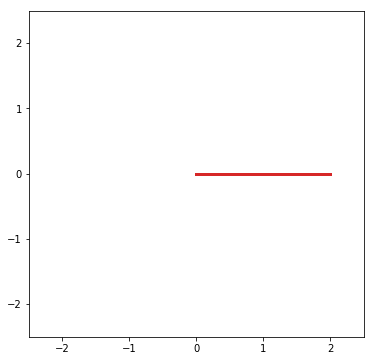

In [10]:
fig = plt.figure(figsize=(6.0, 6.0))
plt.xlim(-2.5*l, 2.5*l)
plt.ylim(-2.5*l, 2.5*l)
pendule_1=plt.plot([0,x_1[0]],[0,y_1[0]],'C3',linewidth=3)[0]
pendule_2=plt.plot([x_1[0],x_2[0]],[y_1[0],y_2[0]],'C3',linewidth=3)[0]
line=plt.plot(x_2[0],y_2[0])[0]

In [11]:
def update_plot(n,x_1,x_2,y_1,y_2):
    pendule_1.set_xdata([0,x_1[n]])
    pendule_1.set_ydata([0,y_1[n]])
    pendule_2.set_xdata([x_1[n],x_2[n]])
    pendule_2.set_ydata([y_1[n],y_2[n]])
    line.set_xdata(x_2[0:n])
    line.set_ydata(y_2[0:n])
    return pendule_1,pendule_2,line

In [12]:
anim = animation.FuncAnimation(fig, update_plot,frames=range(0,20000,20), fargs=(x_1,x_2,y_1,y_2,),interval=20,blit=True)

In [13]:
HTML(anim.to_html5_video())